In [4]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
reg_path = "all_registration.csv"
reg_header = ["day", "date", "time", "user_id", "action", "born", "phone", "country", "acquired_from"]
registration = pd.read_csv(reg_path, delimiter=';', names = reg_header)

In [6]:
free_path = "all_free_tree.csv"
free_tree = pd.read_csv(free_path, delimiter=';', names =["day", "date", "user_id", "action"])

In [7]:
super_path = "all_super_tree.csv"
super_tree = pd.read_csv(super_path, delimiter=';', names =["day", "date", "user_id", "action"])

In [9]:
registration["date"] = pd.to_datetime(registration["date"])

In [10]:
reg_users = registration.groupby("acquired_from")[["user_id"]].nunique()

In [11]:
reg_super = registration.merge(super_tree, how="inner", left_on="user_id", right_on="user_id")

In [12]:
super_sent_by_user = reg_super.groupby("user_id").count()[["acquired_from"]].rename(columns={"acquired_from": "super_sent"})

In [13]:
free_super_sent_users = super_sent_by_user[super_sent_by_user["super_sent"] == 1].reset_index()
free_super_sent_users

,user_id,super_sent
0,1000007,1
1,1000013,1
2,1000019,1
3,1000030,1
4,1000032,1
...,...,...
34602,1284380,1
34603,1284402,1
34604,1284403,1
34605,1284407,1


In [14]:
super_sent_users = super_sent_by_user.copy().rename(columns={"super_sent": "paid_super_sent"})
super_sent_users["paid_super_sent"] = super_sent_users["paid_super_sent"] - 1
paid_super_sent_users = super_sent_users[super_sent_users.paid_super_sent > 0].reset_index()
paid_super_sent_users

,user_id,paid_super_sent
0,1000010,5
1,1000011,1
2,1000022,2
3,1000026,1
4,1000037,2
...,...,...
40024,1284374,2
40025,1284385,2
40026,1284399,3
40027,1284411,2


In [15]:
active_users = registration.merge(free_tree, how="inner", left_on="user_id", right_on="user_id")
active_users = active_users.merge(paid_super_sent_users, how="left", left_on="user_id", right_on="user_id")
active_free_users = active_users[active_users.paid_super_sent.isna()].groupby("user_id").count()[["paid_super_sent"]].reset_index()

In [16]:
reg_free_users = registration.merge(active_free_users, how="inner", left_on="user_id", right_on="user_id")
free_users = reg_free_users.groupby("acquired_from")[["user_id"]].nunique()

In [17]:
reg_users = reg_users.reset_index()
reg_users

,acquired_from,user_id
0,article,37991
1,google,57983
2,invite_a_friend,169622
3,paid,18826


In [18]:
free_users = free_users.reset_index()
free_users

,acquired_from,user_id
0,article,25687
1,google,31517
2,invite_a_friend,113677
3,paid,11695


In [19]:
reg_super_free = registration.merge(free_super_sent_users, how="inner", left_on="user_id", right_on="user_id")
free_super_users = reg_super_free.groupby("acquired_from")[["user_id"]].nunique().reset_index()
free_super_users

,acquired_from,user_id
0,article,3377
1,google,7436
2,invite_a_friend,23788
3,paid,6


In [20]:
reg_paid = registration.merge(paid_super_sent_users, how="inner", left_on="user_id", right_on="user_id")
paid_users = reg_paid.groupby("acquired_from")[["user_id"]].nunique()
paid_users = paid_users.reset_index()
paid_users

,acquired_from,user_id
0,article,872
1,google,6369
2,invite_a_friend,32788


In [21]:
total_reg_users = reg_users["user_id"].sum()
total_free_users = free_users["user_id"].sum()
total_paid_users = paid_users["user_id"].sum()
reg_users["percentage"] = ((reg_users["user_id"] / total_reg_users) * 100).round(2)
free_users["percentage"] = ((free_users["user_id"] / total_free_users) * 100).round(2)
paid_users["percentage"] = ((paid_users["user_id"] / total_paid_users) * 100).round(2)
paid_users

,acquired_from,user_id,percentage
0,article,872,2.18
1,google,6369,15.91
2,invite_a_friend,32788,81.91


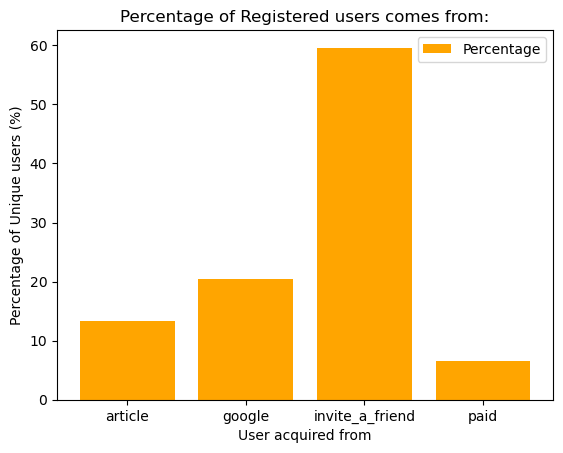

In [91]:
reg_users = reg_users.reset_index()
x = reg_users.acquired_from
y = reg_users.percentage

plt.bar(x,y, label="Percentage", color="orange")
plt.xlabel("User acquired from")
plt.ylabel("Percentage of Unique users (%)")
plt.title("Percentage of Registered users comes from:")
plt.legend()
plt.show()

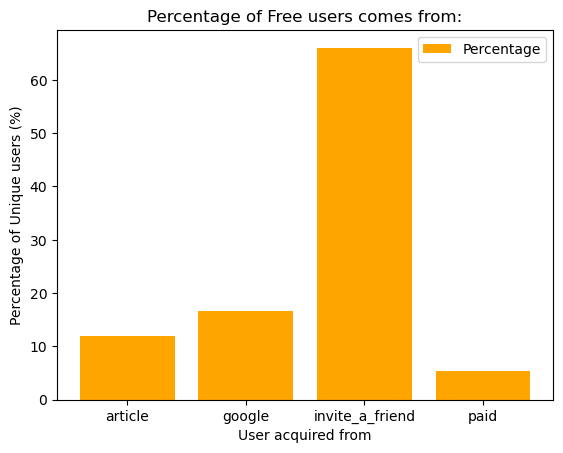

In [136]:
x = free_users.acquired_from
y = free_users.percentage

plt.bar(x,y, label="Percentage", color="orange")
plt.xlabel("User acquired from")
plt.ylabel("Percentage of Unique users (%)")
plt.title("Percentage of Free users comes from:")
plt.legend()
plt.show()

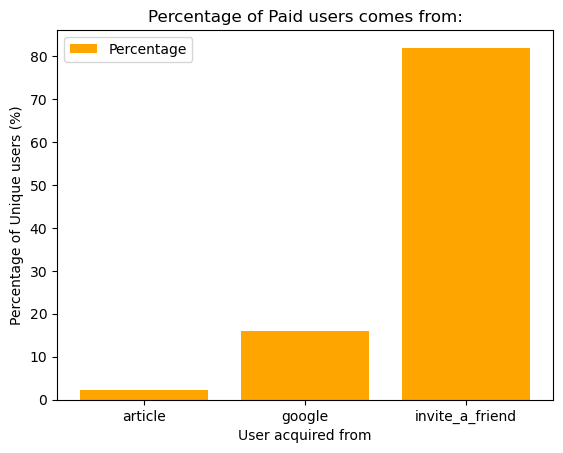

In [92]:
x = paid_users.acquired_from
y = paid_users.percentage

plt.bar(x,y, label="Percentage", color="orange")
plt.xlabel("User acquired from")
plt.ylabel("Percentage of Unique users (%)")
plt.title("Percentage of Paid users comes from:")
plt.legend()
plt.show()

In [93]:
x = paid_users.acquired_from
y = paid_users.user_id

x2 = free_users.acquired_from
y2 = free_users.user_id

x3 = reg_users.acquired_from
y3 = reg_users.user_id

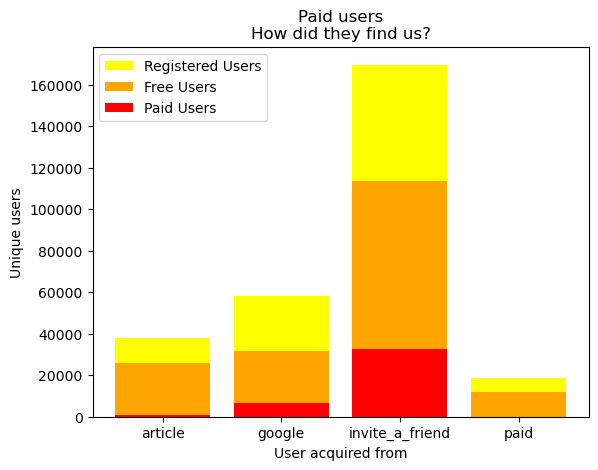

In [94]:
plt.bar(x3, y3, label="Registered Users", color="yellow")
plt.bar(x2, y2, label="Free Users", color="orange")
plt.bar(x,y, label="Paid Users", color="red")
plt.xlabel("User acquired from")
plt.ylabel("Unique users")

plt.title("Paid users\n"
            "How did they find us?")
plt.legend()
plt.show()

In [23]:
paid_users = registration.merge(paid_super_sent_users, how="inner", left_on="user_id", right_on="user_id")
paid_source = paid_users.groupby("acquired_from")[["paid_super_sent"]].sum(numeric_only="True").reset_index()
paid_invite = paid_source[paid_source.acquired_from == "invite_a_friend"].rename(columns={"paid_super_sent": "revenue"})
paid_invite

,acquired_from,revenue
2,invite_a_friend,89129


In [28]:
rev = paid_invite["revenue"].item()
print(f"Total Revenue from invite_a_friend: {rev:,}$")

Total Revenue from invite_a_friend: 89,129$
